# Homework notebook I - Mauricio Vega

This is the first notebook to help you practice your macroeconomic modelling and problem solving skills. It will also be part of your evaluation. Although I prefer, and highly recommend, to solve these tasks in **python**, I will accept any other programming language, as only solutions to the problems will be evaluated.

The notebook consist of the solution of one model, whose balanced growth path needs to be computed numerically:

- Using local approximations

- Using dynamic programing

## The model
Consider the next planning problem of a *dynastic* version of the neoclassical growth model

$$\max_{c_{t}, k_{t+1}, l_{t}}\sum^{\infty}_{t=0}\beta^{t}N_{t}\left\{\log(c_{t})+\mu\frac{(1-l_{t})^{1-\sigma}}{1-\sigma}\right\}$$

subject to:

$$c_{t}+k_{t+1}-(1-\delta)k_{t}=A_{t}k^{\alpha}_{t}l^{1-\alpha}_{t}$$

where $A_{t+1}=(1+\hat{A})A_{t}$ and $N_{t+1}=(1+\hat{N})N_{t}$ are the exogenous growth processes for productivity and population, and $\sigma\geq 0$

### Local approximations

#### Efficiency and feasibility 
Write down, in the next markdown cell, the efficiency conditions and the feasibility constraint that are needed for the solution of the problem:

$$
\begin{aligned}
&\frac{1}{\beta} \frac{c_{t+1}}{c_t}=\alpha \frac{y_{t+1}}{k_{t+1}}+(1-\delta)\\
&\frac{c_t}{A_t}+(1+\hat{A})(1+\hat{N}) k_{t+1}-(1-\delta) k_t=k_t^\alpha l_t^{-\alpha}\\
&c_t=\frac{1-\alpha}{\mu}\left(1-l_t\right)^\sigma A_t k_t^\alpha l_t^{-\alpha}
\end{aligned}
$$

#### Balanced growth path
- Write down, in the next markdown cell, the equations that allow for the solution of the economy in its balanced growth path

- Supose that $\beta=.97$, $\mu=1.5$, $\sigma=2.5$, $\alpha=.3$, $\delta=.08$, $\hat{A}=.025$, $\hat{N}=.015$, compute labor in the balanced growth path

Import libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import approx_fprime


Assign values

In [49]:
beta = 0.97
mu = 1.5
sigma = 2.5
alpha = 0.3
delta = 0.08
Ahat = 0.025
Nhat = 0.015
betaH = beta * ( 1+ Nhat)


BGP

In [50]:
arguments = (alpha,beta,sigma,delta,mu,Ahat,Nhat)

def SystemBGP(x,*args):
    k,l = x
    alpha,beta,sigma,delta,mu,Ahat,Nhat = args
    f1 = alpha * k ** (alpha - 1) * l ** (1 - alpha) + 1 - delta - (1 + Nhat) * (1 + Ahat) ** (1 / (1 - alpha)) / betaH
    f2 = k ** alpha * l ** (1-alpha) + (1 - delta) * k - (1 + Nhat) * (1 + Ahat) ** (1 / (1 - alpha)) * k - (1 - alpha) * (1 - l) ** sigma * k ** alpha * l ** (-alpha) / mu
    return [f1,f2]

In [51]:
a = (alpha,beta,sigma,delta,mu,Ahat,Nhat)
initial_point = [0.2,0.2]
k_0,l_0  = fsolve(SystemBGP, initial_point, args = a)


<font color='blue'>
Labour in the Balanced Growth Path
</font>

In [52]:
l_0

0.27993612072357277

- Plot labor supply in the balance growth path as a function of $\hat{A}\in \left[.01,.04\right]$ and give an intuitive explanation of your results  

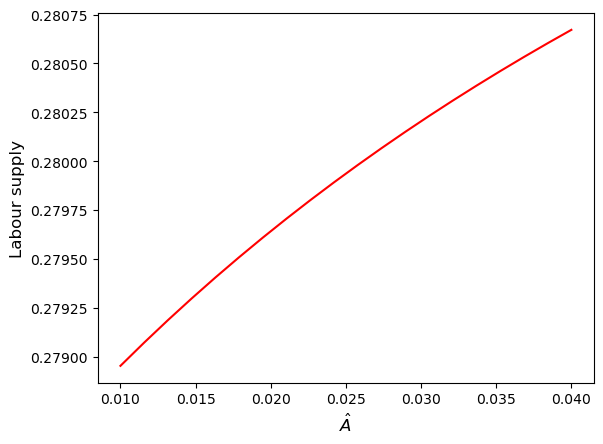

In [53]:
p = 20 #Size of grid for plotting labor 
Ahat_vector = np.linspace(0.01,0.04,p)
labor_choice = np.zeros(p)
arguments = (alpha,beta,sigma,delta,mu,0,Nhat)

for i in range(len(Ahat_vector)):
    productivity_rate = Ahat_vector[i]
    arguments = (alpha,beta,sigma,delta,mu,productivity_rate,Nhat)
    _,labor_choice_i =  fsolve(SystemBGP, initial_point, args = arguments)
    labor_choice[i] = labor_choice_i
    
plt.plot(Ahat_vector, labor_choice, color='red')
plt.xlabel(r'$\hat{A}$', fontsize=12) # Label for the x-axis
plt.ylabel('Labour supply', fontsize=12) # Label for the y-axis
plt.show()

<font color='blue'> The graph illustrates how, in a balanced growth path, an increase in productivity growth rate (A_hat) directly corresponds to an increase in labor supply. This reflects the assumption that population growth adjusts to match productivity growth, highlighting the model's long-term equilibrium where time doesn't impact the proportional relationship between these variables.</font>

#### Log-linearization
- Write down, in the next markdown cell, the log-linearized system of efficiency and feasibility constraints that allow for the application of the undetermined coefficients model

$$
\tilde{k}_t^* = \psi_k(A, L) \tilde{k}_{t-1}^*
$$
$$
\tilde{l}_t^* = \psi_l(A, L) \tilde{k}_{t-1}^*
$$
$$
\tilde{c}_t^* = \psi_c(A, L) \tilde{k}_{t-1}^*
$$

$$ 0 = \psi_c \cdot \psi_k - (1+g) \cdot \psi_c - \beta \cdot \alpha \cdot (\alpha-1) \cdot \frac{y_0}{k_0} \cdot (\psi_k - \psi_l \cdot \psi_k) $$

$$ 0 = \alpha \cdot (1-\alpha) \cdot \frac{y_0}{l_0} \cdot (1-\psi_l) - \mu \cdot \frac{c_0}{(1-l_0)^\sigma} \cdot (\psi_c + \psi_l \cdot \sigma \cdot \frac{l_0}{1+l_0}) $$

$$ 0 = c_0 \cdot \psi_c + (1+\hat{N}) \cdot k_0 \cdot \psi_k - (1-\delta) \cdot k_0 - y_0 \cdot (\alpha + (1-\alpha) \cdot \psi_l)$$



- Use the undetermined coefficient method to plot the labor and consumption policy functions 

In [54]:
def sys_indeterminado(psi, *args):
    psi_c, psi_k, psi_l = psi 
    alpha, beta, sigma, delta, g, Nhat, k_0, c_0, l_0, y_0, mu = args
    
    f1 = psi_c * psi_k - (1+g) * psi_c - beta * alpha * (alpha-1) * y_0/k_0 * ( psi_k - psi_l * psi_k )
    f2 = alpha * ( 1 - alpha ) * y_0/l_0 * ( 1 - psi_l ) - mu * c_0 / ( 1 - l_0 )**sigma * ( psi_c + psi_l * sigma * l_0 / ( 1+l_0 ))
    f3 = c_0 * psi_c + ( 1+Nhat ) * k_0 * psi_k - ( 1-delta ) * k_0 - y_0 * ( alpha + ( 1 - alpha )*psi_l )
    
    f = np.array([f1,f2,f3])
    return f

In [55]:
a = (alpha,beta,sigma,delta,mu,Ahat,Nhat)
initial_point = [.5,0.3]
k_0,l_0 = fsolve(SystemBGP, initial_point, args = a)
y_0 = k_0 ** alpha * l_0 ** ( 1-alpha )
c_0 = ( 1 - alpha) / mu * ( 1 - l_0 ) ** sigma * k_0 ** alpha * l_0 ** (-alpha)
g = (1.0+Ahat)**(1.0/(1.0-alpha))-1.0

arg = (alpha,beta,sigma,delta, g, Nhat, k_0, c_0, l_0, y_0)
argp = (alpha,beta,sigma,delta, g, Nhat, k_0, c_0, l_0, y_0,mu)

initial_psi = [0.5,0.5,0.5]
psi = fsolve(sys_indeterminado,initial_psi,args = argp)
psi

array([ 0.46166395,  0.82271391, -0.19091668])

In [56]:
ss = alpha*delta/(1/beta-1+delta) 
lss = (1-alpha)*Nhat/(1-alpha*(1-ss))
kss = (alpha*Ahat/(1/beta-1+delta))**(1/(1-alpha))*lss
yss = Ahat*lss**(1-alpha)*kss**alpha

In [57]:
# Necesitamos definir un grid para obtener las reglas de 
# decisión
nk = 1000
kgrid = np.linspace(
    start = 0.01,
    stop = 3*kss,
    num = nk
    )


#### Calibration
Use annual data for the US post-war period to find $\beta$, $\mu$. Keep the rest of the parameters set to the already stablished values. 

#### Simulation 
Use the policy functions for the new calibrated parameters to study the convergence trayectory of consumption and labor supply to a permanent productivity slowdown to a productivity growth $\hat{A}'=.012$ and give an intuitive explanation of your results, keep the rest of the parameters constant

- You may use the perfect foresight algorithm in Dynare

In [58]:
%load_ext oct2py.ipython

### Dynamic programming 

#### Bellman equation
Write down the Bellman equation of the planning problem in the next markdown cell

The dynamic problem is 
$$v(\hat{k}) = \max_{\hat{c},l,k'} \left\{\log{\hat{c}}+\mu\frac{(1-l)^{\sigma}}{1-\sigma}+\hat{\beta} v(\hat{k}')\right\}$$

subject to:
$$\hat{c} + (1+\hat{N})(1+\hat{A})^{\frac{1}{1-\alpha}}\hat{k}' - (1-\delta) \hat{k} = \hat{k}^{\alpha} l^{1-\alpha}$$

#### Value function iteration
Implement the value function iteration algorithm to compute the policy functions for consumption and labor, and plot them. Use the last set of parameters you found. 

/var/folders/xv/t0p_3f453gg3q7j_sl724ldr0000gn/T/ipykernel_15128/3618871632.py:11: RuntimeWarning: invalid value encountered in power
  t1 = k_i ** alpha * l ** ( 1 - alpha )
/var/folders/xv/t0p_3f453gg3q7j_sl724ldr0000gn/T/ipykernel_15128/3618871632.py:20: RuntimeWarning: invalid value encountered in power
  t4 = ( 1 - alpha ) * ( 1 - l ) ** sigma * k_i ** alpha * l ** (-alpha)
/Users/mauricio/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


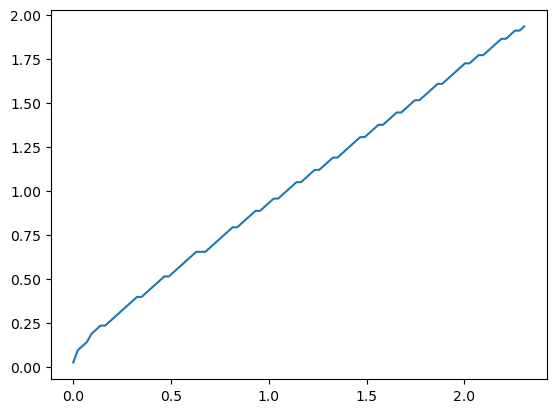

In [59]:
kmin = .0001
kmax=3.0*k_0
nk = 100
kgrid = np.linspace(
    start=kmin, 
    stop=kmax, 
    num=nk
)

def consumption(l, k_i, k_j, Ahat, Nhat, delta, alpha):
    t1 = k_i ** alpha * l ** ( 1 - alpha )
    t2 = ( 1 - delta ) * k_i
    t3 = ( 1 + Nhat ) * ( 1 + Ahat ) ** ( 1 / (1-alpha) ) * k_j
    return t1 + t2 - t3


def labor_equation(l,*args):
    k_i, k_j, Ahat, Nhat, delta, alpha, mu, sigma = args
    consumption_ij = consumption(l, k_i, k_j, Ahat, Nhat, delta, alpha)
    t4 = ( 1 - alpha ) * ( 1 - l ) ** sigma * k_i ** alpha * l ** (-alpha)
    t4 = t4 / mu
    return consumption(l, k_i, k_j, Ahat, Nhat, delta, alpha) - t4

    
def labor_consumption(gridk, Ahat, Nhat, delta, alpha, mu, sigma):
    partial_args = (Ahat, Nhat, delta, alpha, mu, sigma)
    n = len(gridk)
    C = np.zeros((n,n))
    L = np.zeros((n,n))
    
    for i in range(n):
        k_i = gridk[i]
        for j in range(n):
            k_j = gridk[j]
            
            corner1 = consumption(1, k_i, k_j, Ahat, Nhat, delta, alpha)
            if corner1<0: 
                c = 0
                l = 1
            else:
                
                args = (k_i,k_j)+ partial_args
                l = fsolve(labor_equation,0.3,args)
                
                #Compute consumption
                c = consumption(l, k_i, k_j, Ahat, Nhat, delta, alpha)
            l = 1 if c<=0 else l
            C[i,j] = c
            L[i,j] = l
    return C,L
            
def utility(consumo,labor,mu,sigma):
    n = len(consumo)
    U = -1.0e+6*np.ones((n,n))
    U[consumo > 0] = np.log(consumo[consumo>0]) + mu * (1-labor[consumo>0]) ** (1-sigma) / (1-sigma)
    return U

vInit = np.zeros((nk,1))
def bellman(vInit, grid, Ahat, Nhat, betaH, alpha, delta, mu, sigma):
    n = len(grid)
    C,L = labor_consumption(grid, Ahat, Nhat, delta, alpha, mu, sigma)
    U = utility(C,L,mu,sigma)
    
#    Vp = U+beta*vInit*np.ones((1,n))
#    vInit = np.zeros((nk, 1))
    tol = 1.0e-6
    err = 100
    
    # Inicializamos la iteración de la función de 
    # valor
    i = 0 # set a counter
    err=100 # set initial error > tolerance
    while (err>tol):
        Vp = U+betaH*vInit*np.ones((1,nk))
        maxVp = np.max(Vp.T, axis=0)
        err = np.max(np.abs(vInit-maxVp)) # supremum norm
        vInit = maxVp
        # Dejar de comentar si queremos analizar
        # el proceso de convergencia y el número
        # de repeticiones
     #   print([i, err])
        i = i+1

    Vp = U+betaH*vInit*np.ones((1,nk))
    ind = np.argmax(Vp.T, axis=0)
    Kp = grid[ind]
    return Vp, Kp

vopt, kpol = bellman(vInit, kgrid, Ahat, Nhat, beta, alpha, delta, mu, sigma)

plt.plot(kgrid,kpol)

#### Simulation
Use the policy funtions to simulate the same productivity slowdown than in the local approximation 

### Decentralized value function iteration

#### The small-k big-k algorithm
Use the algorithm that we studied in class to compute a decentralized recursive version of this economy, and plot the consumption and labor supply policy functions over aggregate capital  